##Build a model to recognize disease in Corn

**1.Load the data from gdrive to colab and unzip it**

**2.Become one with data(Data Preprocessing)**

**3.Build a VGG-16 model that we done before on Apple disease prediction tensorflow nn model**

**4.Train the model on the Corn image dataset and choose the better model**

**4.Evaluate and Visualize the predictions**

---


**Step1.**
Load the Grape plant disease data from google drive and unzip the file

---

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
from zipfile import ZipFile
zip_ref=ZipFile('/gdrive/MyDrive/Corn.zip')
zip_ref.extractall()
zip_ref.close()

**Step2.** Become one with data and preprocess the *Grap* image dataset

---

In [3]:
import os
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

*Get the number of directories and images on the Grap folder*


In [4]:
for directory_path,directory_name,file_names in os.walk("Corn"):
  print(f"There are {len(directory_name)} directories and {len(file_names)} images are in :{directory_path}")

There are 3 directories and 1 images are in :Corn
There are 0 directories and 3 images are in :Corn/test
There are 3 directories and 1 images are in :Corn/train
There are 0 directories and 1908 images are in :Corn/train/Corn_(maize)___Northern_Leaf_Blight
There are 0 directories and 1642 images are in :Corn/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
There are 0 directories and 1859 images are in :Corn/train/Corn_(maize)___healthy
There are 3 directories and 1 images are in :Corn/valid
There are 0 directories and 477 images are in :Corn/valid/Corn_(maize)___Northern_Leaf_Blight
There are 0 directories and 410 images are in :Corn/valid/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
There are 0 directories and 465 images are in :Corn/valid/Corn_(maize)___healthy


Visualize some random images from selected folder


In [5]:
def visualize_image(path,disease):
  if(disease!='.DS_Store'):
    rand_img=np.random.choice(os.listdir(os.path.join(path,disease)))
    image=mpimg.imread(os.path.join(path,disease,rand_img))
    plt.figure(figsize=(8,6))
    plt.imshow(image)
    print(image.shape)
    plt.gca().invert_yaxis()
    color="red"
    #Green text for healthy plant and red for diseased plant
    if(disease=="Corn___healthy"):color="green"
    plt.title(disease,fontsize=15,color=color)

In [6]:
Random_image=np.random.choice(os.listdir("Corn/train/"))
visualize_image("Corn/train/",Random_image) 

**First train the VGG-16 architecture model with non-augmented data and check the performance**

In [7]:
#Normalize the data using ImageDataGeneator
traindata_gen=ImageDataGenerator(rescale=1/255.)
valdata_gen=ImageDataGenerator(rescale=1/255.)

In [8]:
''' 
Mapping our training and validation data to the ImageDataGenerator instance and using the function flow_from_directory
we define our taret_size,class_mode and batch_size
'''

traindata=traindata_gen.flow_from_directory("Corn/train",
                                            target_size=(256,256),
                                            class_mode="categorical",
                                            batch_size=32)
validdata=valdata_gen.flow_from_directory("Corn/valid",
                                         target_size=(256,256),
                                         class_mode="categorical",
                                         batch_size=32)

Found 5409 images belonging to 3 classes.
Found 1352 images belonging to 3 classes.


**Step3.**


Use VGG-16 architecture to build the model

In [9]:
'''The above VGG-16 model is a pretty complex model that can genaralize 1000 classes 
but we have only 4 classes(labels) on out Apple disease data
'''

model2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=(256,256,3),activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax")

])
history=model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [10]:
#define a callback for Earlystopping

early_stop=EarlyStopping(monitor='val_loss',patience=3,verbose=1)

model2.fit(traindata, steps_per_epoch=len(traindata),epochs=20,
           validation_data=validdata,
           validation_steps=len(validdata),callbacks=[early_stop])

Epoch 1/20
170/170 [==============================] - 28s 102ms/step - loss: 0.6134 - accuracy: 0.6802 - val_loss: 0.2996 - val_accuracy: 0.8669
Epoch 2/20
170/170 [==============================] - 18s 103ms/step - loss: 0.2419 - accuracy: 0.9066 - val_loss: 0.1868 - val_accuracy: 0.9238
Epoch 3/20
170/170 [==============================] - 17s 98ms/step - loss: 0.1740 - accuracy: 0.9349 - val_loss: 0.2036 - val_accuracy: 0.9297
Epoch 4/20
170/170 [==============================] - 17s 97ms/step - loss: 0.1598 - accuracy: 0.9421 - val_loss: 0.1412 - val_accuracy: 0.9534
Epoch 5/20
170/170 [==============================] - 17s 97ms/step - loss: 0.1303 - accuracy: 0.9499 - val_loss: 0.1299 - val_accuracy: 0.9453
Epoch 6/20
170/170 [==============================] - 18s 105ms/step - loss: 0.1390 - accuracy: 0.9499 - val_loss: 0.1498 - val_accuracy: 0.9386
Epoch 7/20
170/170 [==============================] - 17s 98ms/step - loss: 0.1153 - accuracy: 0.9593 - val_loss: 0.1259 - val_accura

In [11]:
def plot_loss_accuracy_curves(model):
  plt.figure()
  plt.plot(model.history.history['loss'],'r')
  plt.plot(model.history.history['val_loss'],'b')
  plt.title("loss curves",fontsize=14)
  # plt.axis(False);
  plt.figure()
  plt.plot(model.history.history['accuracy'],'r')
  plt.plot(model.history.history['val_accuracy'],'b')
  plt.title("accuracy",fontsize=14)

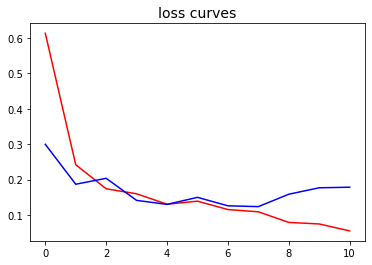

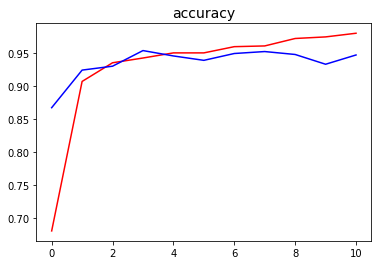

In [12]:
plot_loss_accuracy_curves(model2)

In [13]:
#Evaluate our model
model2.evaluate(validdata)

43/43 [==============================] - 3s 71ms/step - loss: 0.1784 - accuracy: 0.9467


[0.17840108275413513, 0.9467455744743347]

**Observation:**
Model2 performs well with non-augmented data.Let's try it on augmented data and check the performance

Step4. Create a model and name it model3 which'll be trained using augmented training data



In [14]:
traindata_aug_gen=ImageDataGenerator(rescale=1/255.,
                                    rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True
                                     )

In [15]:
train_aug_data=traindata_aug_gen.flow_from_directory('Corn/train',
                                                     target_size=(256,256),
                                                     class_mode="categorical",
                                                     batch_size=32)

Found 5409 images belonging to 3 classes.


In [16]:
model3=tf.keras.models.clone_model(model2)
model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model3.fit(train_aug_data,epochs=20,steps_per_epoch=len(train_aug_data),
           validation_data=validdata,
           validation_steps=len(validdata),callbacks=[early_stop])

Epoch 1/20
170/170 [==============================] - 80s 468ms/step - loss: 0.6363 - accuracy: 0.6920 - val_loss: 0.3787 - val_accuracy: 0.7862
Epoch 2/20
170/170 [==============================] - 78s 461ms/step - loss: 0.2688 - accuracy: 0.8765 - val_loss: 0.3044 - val_accuracy: 0.8713
Epoch 3/20
170/170 [==============================] - 78s 460ms/step - loss: 0.2855 - accuracy: 0.8839 - val_loss: 0.2817 - val_accuracy: 0.8957
Epoch 4/20
170/170 [==============================] - 79s 467ms/step - loss: 0.2570 - accuracy: 0.8930 - val_loss: 0.2607 - val_accuracy: 0.8876
Epoch 5/20
170/170 [==============================] - 78s 458ms/step - loss: 0.2157 - accuracy: 0.9046 - val_loss: 0.1960 - val_accuracy: 0.9186
Epoch 6/20
170/170 [==============================] - 79s 463ms/step - loss: 0.2221 - accuracy: 0.9077 - val_loss: 0.2038 - val_accuracy: 0.9090
Epoch 7/20
170/170 [==============================] - 78s 458ms/step - loss: 0.2263 - accuracy: 0.9057 - val_loss: 0.1519 - val_ac

In [17]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                    

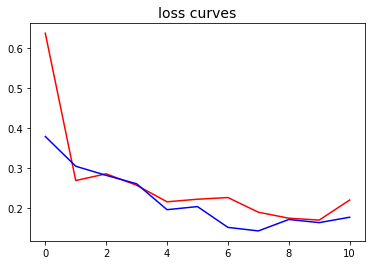

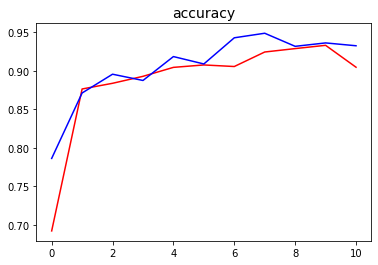

In [18]:
plot_loss_accuracy_curves(model3)

Evaluation of validation data on `model3`

In [19]:
model3.evaluate(validdata)

43/43 [==============================] - 3s 70ms/step - loss: 0.1772 - accuracy: 0.9327


[0.17719635367393494, 0.932692289352417]

Evaluation of validation data on `model2`

In [20]:
model2.evaluate(validdata)

43/43 [==============================] - 3s 71ms/step - loss: 0.1784 - accuracy: 0.9467


[0.17840106785297394, 0.9467455744743347]

In [21]:
model2.save("model2_Corn.h5")
model3.save("model3_Corn.h5")

**Observation:**

As per the above observation `model3` and `model2` both  performs well on validation data.

where `model3` gave an accuracy: 93.27%

where `model2` gave an accuracy: 95%

Save the models and copy it to gdrive

In [22]:
shutil.copy("model2_Corn.h5",'/gdrive/MyDrive')

'/gdrive/MyDrive/model2_Corn.h5'

In [23]:
shutil.copy("model3_Corn.h5",'/gdrive/MyDrive')

'/gdrive/MyDrive/model3_Corn.h5'

In [24]:
def load_and_prep_data(path):
  img=tf.io.read_file(path)
  #decode the image into tensor
  tensor=tf.io.decode_image(img,channels=3)

  image=tf.image.resize(tensor,[256,256])
  #normalize the image
  image=image/255.

  #we need to expand the first axis beacuse of batch size
  image=tf.expand_dims(image,axis=0)
  #(1,256,256,3) 

  return image

In [25]:
class_keys=list(traindata.class_indices.keys())

In [38]:
def visualize_random_class(model):
  plt.figure(figsize=(6,5))
  class_name=np.random.choice(os.listdir("Corn/valid"))
  image_name=np.random.choice(os.listdir(os.path.join("Corn/valid",class_name)))
  img=load_and_prep_data(os.path.join("Corn/valid",class_name,image_name))
  pred=model.predict(img)
  plt.imshow(tf.squeeze(img))
  index=tf.argmax(pred[0])
  confidence=pred[0][index]
  color="red"
  if(class_name == class_keys[index]):color="green"
  plt.title(class_keys[index]+f"\n\n Confidence: {confidence*100:.2f}%",color=color,fontsize=13)

def predict_and_visualize(model):
  plt.figure(figsize=(12,16))
  for i,j in enumerate(os.listdir("/content/Corn/test")):
    plt.subplot(3,3,i+1)

    # call the preprocessing function load_and_prep_data() method to preprocess the image into tensors
    pro_image=load_and_prep_data(os.path.join("/content/Corn/test",j))
  
    #predict using given model
    pred=model.predict(pro_image)

    #get the index of the max probability that is returned from softmax activation function
    index=tf.argmax(pred[0])

    #calculate the confidence
    confidence=pred[0][index]*100

    #plot the image with title
    plt.imshow(tf.squeeze(pro_image))
    plt.title(class_keys[index]+f"\n\n Confidence:{confidence:.2f}%",fontsize=13)
    plt.xlabel("True class: "+j,fontsize=12)

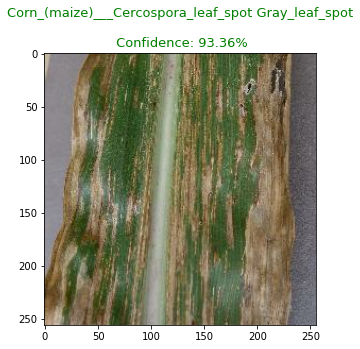

In [39]:
visualize_random_class(model2)

Predict on custom image

[2.1032162e-02 5.4198033e-03 9.9973541e+01]


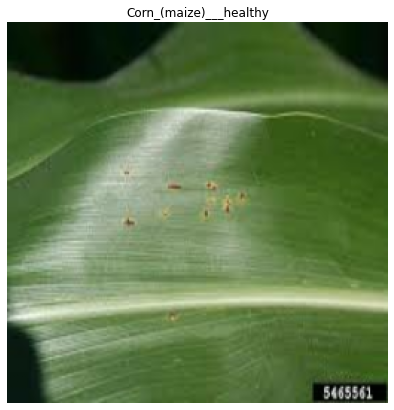

In [42]:
pro_image=load_and_prep_data("healthy.jpeg")
  
#predict using given model
pred=model2.predict(pro_image)
print(pred[0]*100)
#get the index of the max probability that is returned from softmax activation function
index=tf.argmax(pred[0])
plt.figure(figsize=(8,7))
plt.imshow(tf.squeeze(pro_image))
plt.title(class_keys[index])
plt.axis(False)
plt.show()